/Users/boss/CacheSimulator/logs/linpack_page_64_levels_3_L1_size_2_sets_2_L2_size_200_sets_4_L3_size_800_sets_4_ddr_banks_16_row_size2_ip_0.csv


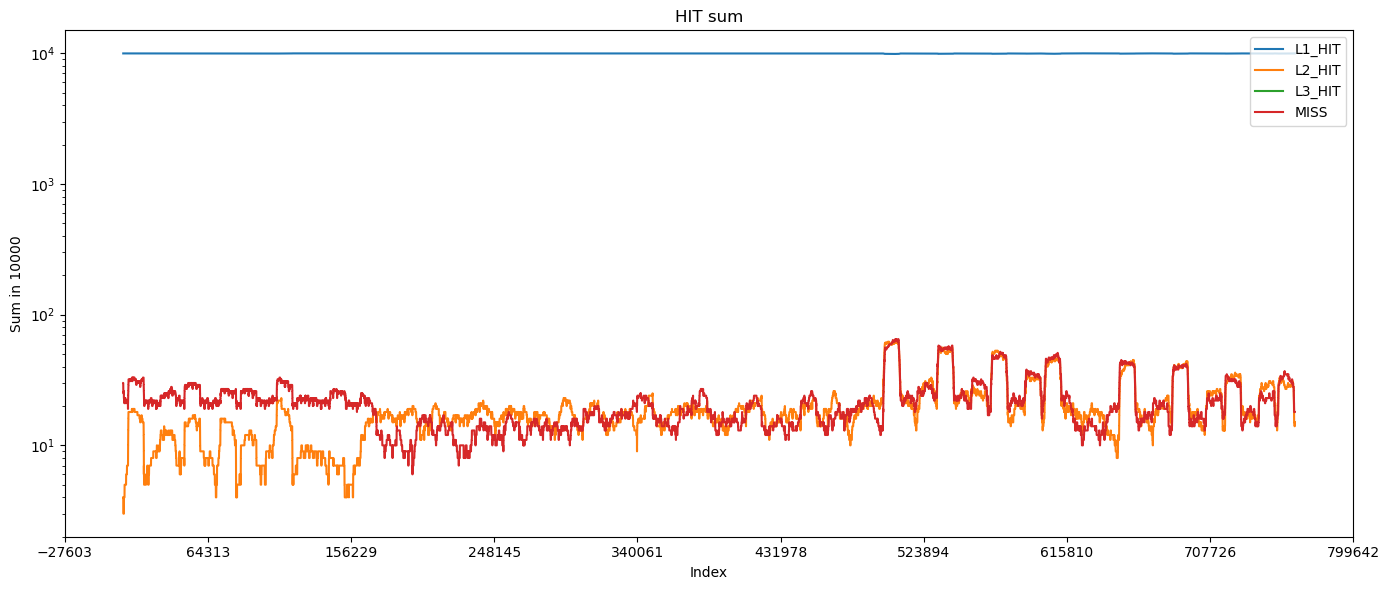

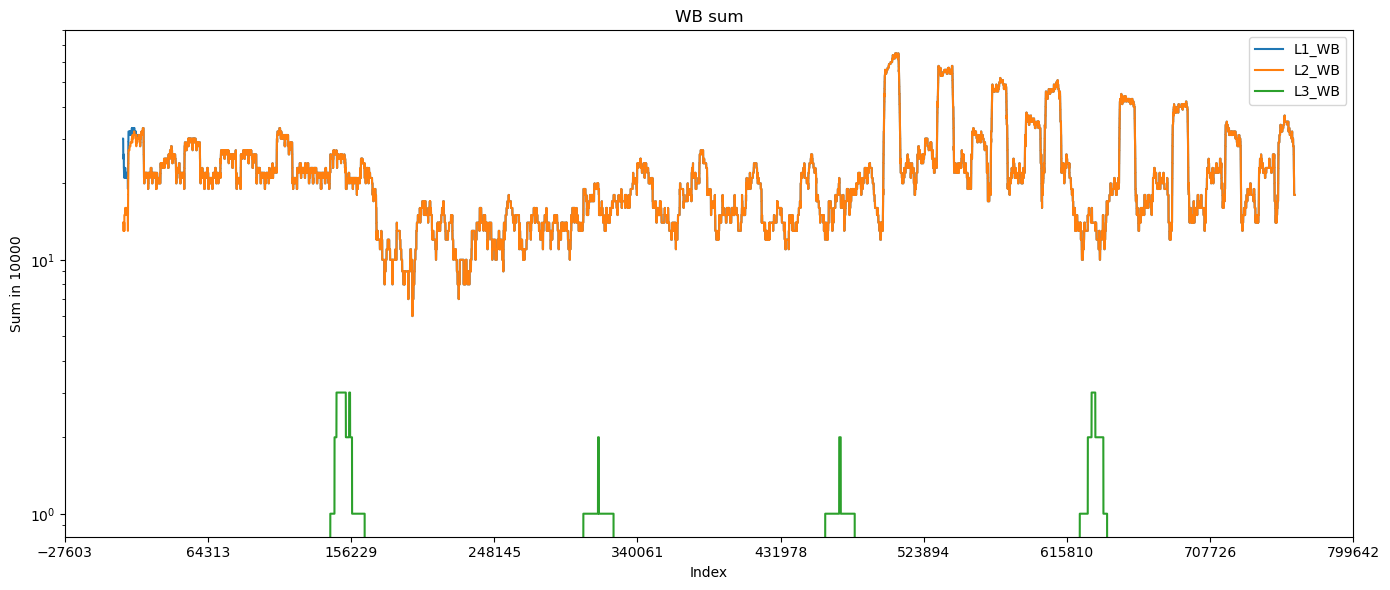

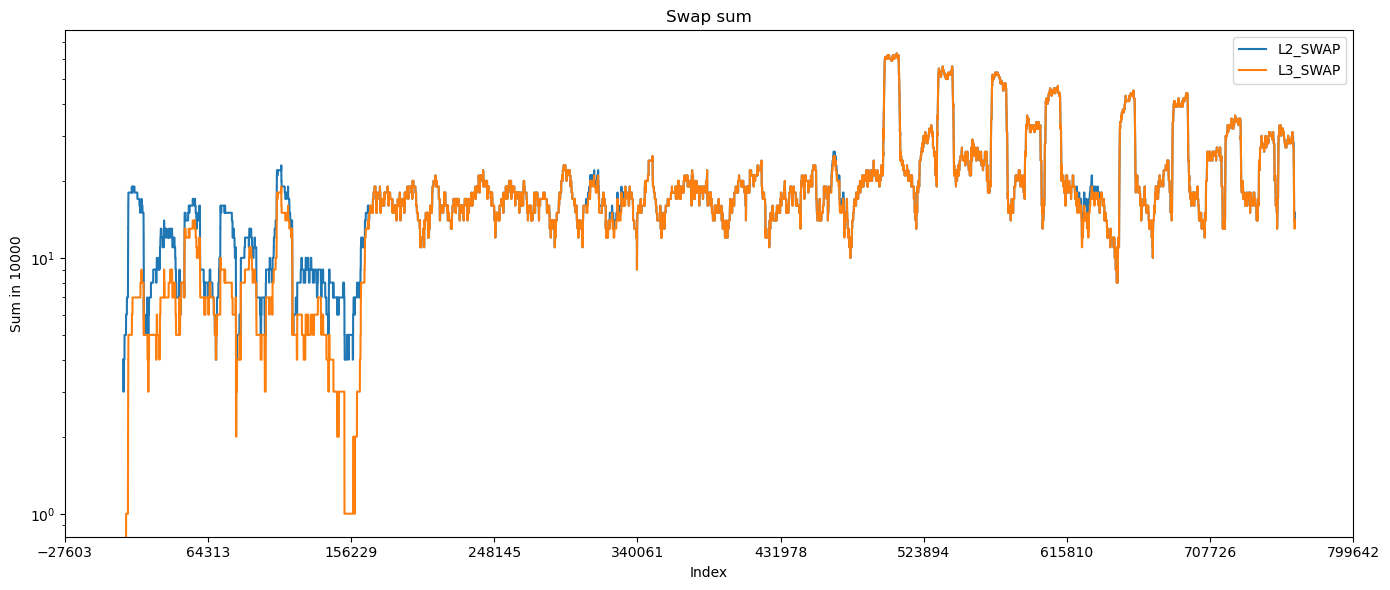

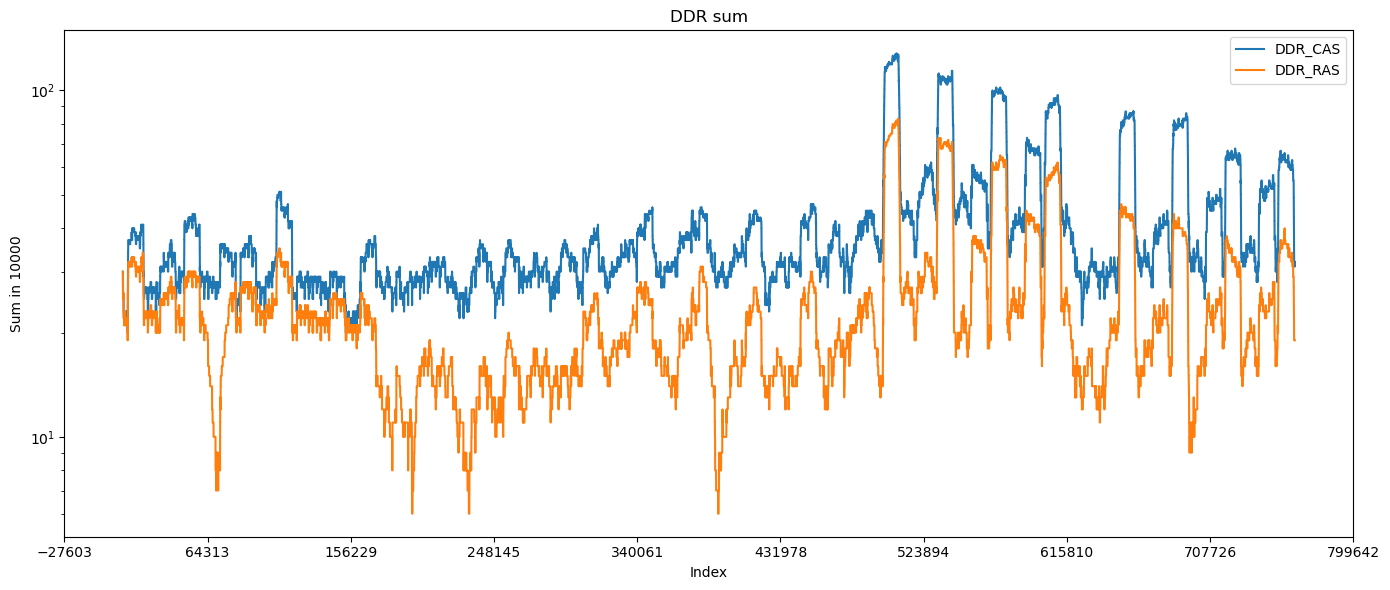

In [6]:
import os
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator

hit_sum = ['L1_HIT', 'L2_HIT', 'L3_HIT', 'MISS']
write_back_sum = ['L1_WB', 'L2_WB', 'L3_WB']
swap_sum = ['L2_SWAP', 'L3_SWAP']
ddr_sum = ['DDR_CAS', 'DDR_RAS']

window_size = 10000

def make_plot(data, x_data, title):
    rolling_sums = data[x_data].rolling(window=window_size).sum()
    rolling_sums['Trace_No'] = data['Trace_No'].values
    fig, axs = plt.subplots(figsize=(14, 6), sharex=True)

    for col in x_data:
        axs.plot(rolling_sums['Trace_No'], rolling_sums[col], label=col)
    axs.set_ylabel(f'Sum in {window_size}')
    axs.set_yscale('log')
    axs.legend(loc='upper right')
    axs.set_title(title)
    axs.set_xlabel('Index')
    axs.xaxis.set_major_locator(LinearLocator(numticks=10))

    plt.tight_layout()
    plt.show()
    

def select_and_read_csv():
    root = tk.Tk()
    root.withdraw()
    
    file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
    if file_path:
        try:
            data = pd.read_csv(file_path, delimiter=';')
            file_name = os.path.basename(file_path)
            print(f'Lowded file: {file_name}')
            data = data.apply(pd.to_numeric, errors='ignore')

            make_plot(data, hit_sum, 'HIT sum')
            make_plot(data, write_back_sum, 'WB sum')
            make_plot(data, swap_sum, 'Swap sum')
            make_plot(data, ddr_sum, 'DDR sum')
        except Exception as e:
            print(f'Read file {file_path} ERROR: {e}')
        

select_and_read_csv()